In [38]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [39]:
df=pd.read_csv('covid_and_healthy_spectra.csv')

features=df.iloc[:,:-1]
target=df.iloc[:,-1]


Explained variance > 0.95: [False False False  True  True] ...


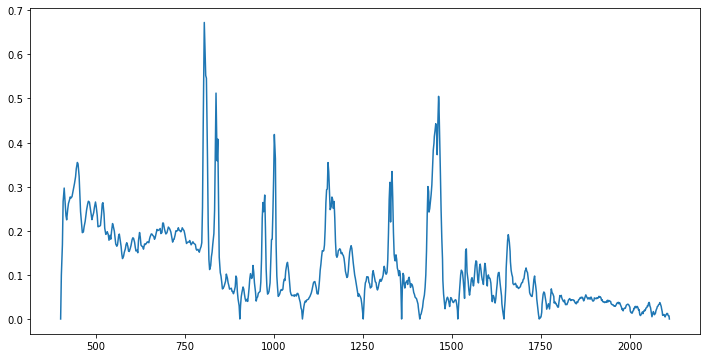

In [40]:
pca = PCA(n_components=50)
X_pca = pca.fit(features).transform(features)


print("Explained variance > 0.95:", (pca.explained_variance_ratio_.cumsum() > 0.95)[0:5], "...")
plt.figure(figsize=(12,6))
plt.plot(df.columns[:-1].astype(int), np.abs(pca.components_[0:5]).sum(axis=0))
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,target, test_size=0.20, random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = LogisticRegression(penalty='l1',random_state=0,solver='liblinear')


#Fitting the model
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.9838709677419355
